# NVDA stock price: auto-strading

Design stock trading rules, realize automatic trading and calculate the rate of return

In [2]:
# print all the output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("NVDA(1).csv", index_col = 0, parse_dates = True)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.510901,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.669186,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.539680,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.534883,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.530087,5688000


## Original method

In [16]:
close = data['Close']
(close[-1] - close[0])/close[0]
((close.shift(-5) - close)/close).describe()
((close.shift(-10) - close)/close).describe()
((close.shift(-100) - close)/close).describe()
((close.shift(-500) - close)/close).describe()

150.14361965714284

count    5283.000000
mean        0.008550
std         0.089273
min        -0.442047
25%        -0.034933
50%         0.005808
75%         0.048289
max         1.551282
Name: Close, dtype: float64

count    5278.000000
mean        0.016959
std         0.123951
min        -0.502603
25%        -0.046874
50%         0.013766
75%         0.073613
max         1.456790
Name: Close, dtype: float64

count    5188.000000
mean        0.191012
std         0.493801
min        -0.839552
25%        -0.086153
50%         0.138542
75%         0.412527
max         6.678455
Name: Close, dtype: float64

count    4788.000000
mean        1.193812
std         2.075674
min        -0.796795
25%        -0.137601
50%         0.463310
75%         1.671805
max        10.853437
Name: Close, dtype: float64

This stock is more suitable for long-time value investment

## Data plot

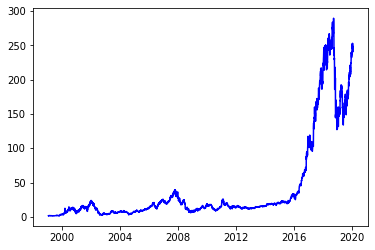

In [17]:
plt.plot(close, 'b')

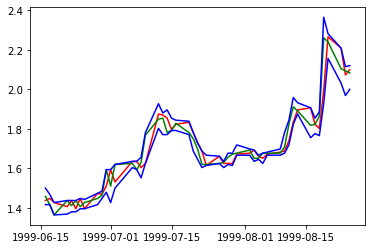

In [18]:
plt.plot(data.iloc[100:150,0], 'r')
plt.plot(data.iloc[100:150,3], 'g')

plt.plot(data.iloc[100:150,1], 'b')
plt.plot(data.iloc[100:150,2], 'b')

In [19]:
close_10 = close.rolling(window = 10).mean()
close_20 = close.rolling(window = 20).mean()

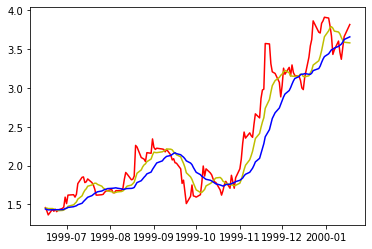

In [20]:
plt.plot(close[100:250], 'r')
plt.plot(close_10[100:250], 'y')
plt.plot(close_20[100:250], 'b')

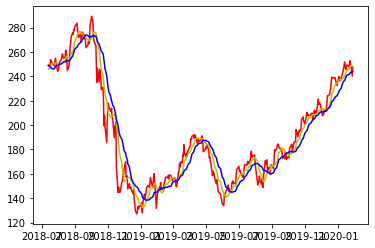

In [21]:
plt.plot(close[4900:], 'r')
plt.plot(close_10[4900:], 'y')
plt.plot(close_20[4900:], 'b')

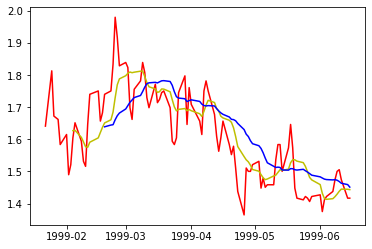

In [22]:
plt.plot(close[:100], 'r')
plt.plot(close_10[:100], 'y')
plt.plot(close_20[:100], 'b')

## Long_term investment

In [23]:
compare_10 = close - close_10
compare_20 = close - close_20

### 10-days average

In [24]:
compare_10.head(15)
compare_10.shift(1).head(15)

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26         NaN
1999-01-27         NaN
1999-01-28         NaN
1999-01-29         NaN
1999-02-01         NaN
1999-02-02         NaN
1999-02-03         NaN
1999-02-04   -0.022395
1999-02-05    0.023438
1999-02-08   -0.011979
1999-02-09   -0.060417
1999-02-10   -0.060937
1999-02-11    0.070833
Name: Close, dtype: float64

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26         NaN
1999-01-27         NaN
1999-01-28         NaN
1999-01-29         NaN
1999-02-01         NaN
1999-02-02         NaN
1999-02-03         NaN
1999-02-04         NaN
1999-02-05   -0.022395
1999-02-08    0.023438
1999-02-09   -0.011979
1999-02-10   -0.060417
1999-02-11   -0.060937
Name: Close, dtype: float64

In [34]:
buy_10 = []
sale_10 = []

In [35]:
for i in range(10, len(compare_10)):
    if compare_10[i] > 0 and compare_10.shift(1)[i] < 0:
        buy_10.append(close[i])
    elif compare_10[i] < 0 and compare_10.shift(1)[i] >0:
        sale_10.append(close[i])

In [37]:
len(buy_10)
len(sale_10)

410

410

In [28]:
return_rate = [(sale_10[i] - buy_10[i])/buy_10[i] for i in range(0, len(sale_10))]

In [29]:
np.mean(return_rate)

0.01811937480685075

In [30]:
np.sum(return_rate)

7.428943670808808

In [31]:
ls_10 = [return_rate[i] + 1 for i in range(0, len(return_rate))]

In [32]:
from functools import reduce
reduce(lambda x, y : x * y, ls_10)

243.23656468843762

### 20-days average

In [33]:
compare_20.head(35)

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26         NaN
1999-01-27         NaN
1999-01-28         NaN
1999-01-29         NaN
1999-02-01         NaN
1999-02-02         NaN
1999-02-03         NaN
1999-02-04         NaN
1999-02-05         NaN
1999-02-08         NaN
1999-02-09         NaN
1999-02-10         NaN
1999-02-11         NaN
1999-02-12         NaN
1999-02-16         NaN
1999-02-17         NaN
1999-02-18         NaN
1999-02-19    0.101041
1999-02-22    0.105990
1999-02-23    0.188281
1999-02-24    0.318750
1999-02-25    0.243750
1999-02-26    0.146875
1999-03-01    0.144532
1999-03-02    0.118490
1999-03-03   -0.016927
1999-03-04   -0.060417
1999-03-05    0.025781
1999-03-08    0.045313
1999-03-09    0.090365
1999-03-10    0.045313
1999-03-11   -0.043489
1999-03-12   -0.077343
Name: Close, dtype: float64

In [45]:
buy_20 = []
sale_20 = []
for i in range(20, len(compare_10)):
    if compare_20[i] > 0 and compare_20.shift(1)[i] < 0:
        buy_20.append(close[i])
    elif compare_20[i] < 0 and compare_20.shift(1)[i] >0:
        sale_20.append(close[i])

In [46]:
len(buy_20)
len(sale_20)

284

284

In [47]:
sale_20.pop(0)
buy_20.pop(-1)

1.697917

247.97000099999997

In [48]:
return_rate_20 = [(sale_20[i] - buy_20[i])/buy_20[i] for i in range(0, len(sale_20))]

In [49]:
np.mean(return_rate_20)
np.sum(return_rate_20)

0.02536453384213772

7.1781630773249745

In [50]:
ls_20 = [return_rate_20[i] + 1 for i in range(0, len(return_rate_20))]

In [51]:
from functools import reduce
reduce(lambda x, y : x * y, ls_20)

125.87687161191596